# Perform object detection with pollen-vision

Learn how to perform zero shot object detection with the pollen-vision library, using the OWL-ViT model.

This notebook will show you how to use our wrapper for the OWL-ViT object detection model developed by the Google Research lab. 

![Gif Object detection from Reachy's egocentric view](https://media.githubusercontent.com/media/pollen-robotics/pollen-vision/develop/examples/vision_models_examples/gif/reachy_kitchen_detection.gif)

## A word on OWL-ViT
OWL-ViT stands for Vision Transformer for Open-World Localization. It is a zero shot object detection model, meaning the model is able to perform object detection based on text queries, without needing to retrain the model on any labeled data, as it is the case with traditional Deep Learning object detection models.

You can find more information on the model on the dedicated page of the [Hugging Face documentation](https://huggingface.co/docs/transformers/model_doc/owlvit). The implementation of the wrapper actually uses Hugging Face's [transformers library](https://huggingface.co/docs/transformers/index).

## Setup environment

> Note: If you are working locally on your machine and have already installed the library from source, discard the following.

We need to first install the pollen-vision library. We will install the library from source, this might take a couple of minutes as there are quite heavy dependencies.

In [1]:
!pip install "pollen-vision[vision] @ git+https://github.com/pollen-robotics/pollen-vision.git@99-make-the-notebooks-runnable-on-google-colab"

  Cloning https://github.com/pollen-robotics/pollen-vision.git (to revision 99-make-the-notebooks-runnable-on-google-colab) to /tmp/pip-install-4_i_eol_/pollen-vision_e86108b464c34a28a99ff4336477c73f
  Running command git clone --filter=blob:none --quiet https://github.com/pollen-robotics/pollen-vision.git /tmp/pip-install-4_i_eol_/pollen-vision_e86108b464c34a28a99ff4336477c73f
  Running command git checkout -b 99-make-the-notebooks-runnable-on-google-colab --track origin/99-make-the-notebooks-runnable-on-google-colab
  Switched to a new branch '99-make-the-notebooks-runnable-on-google-colab'
  Branch '99-make-the-notebooks-runnable-on-google-colab' set up to track remote branch '99-make-the-notebooks-runnable-on-google-colab' from 'origin'.
  Resolved https://github.com/pollen-robotics/pollen-vision.git to commit 7b5e82d1849222c5b677d640587e42a9c0c5b884
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  

  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached exceptiongroup-1.2.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached frozenlist-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached yarl-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached httpcore-1.0.4-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cach

  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
  Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.99-py3-none-manyli

  Using cached MarkupSafe-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
Using cached openai-1.12.0-py3-none-any.whl (226 kB)
Using cached opencv_contrib_python-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.8 MB)
Using cached datasets-2.18.0-py3-none-any.whl (510 kB)
Using cached timm-0.4.12-py3-none-any.whl (376 kB)
Using c

Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Using cached MarkupSafe-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Using cached wcwidth-0.2.13-py2.py3-none-any.whl (34 kB)
Using cached nvidia_nvjitlink_cu12-12.4.99-py3-none-manylinux2014_x86_64.whl (21.1 MB)
Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Created wheel for pollen-vision: filename=pollen_visi

## Use OWL-ViT

Let's use the OwlViT wrapper to perform zero shot object detection.

In [2]:
import numpy as np
from PIL import Image

from pollen_vision.vision_models.object_detection import OwlVitWrapper

In [3]:
object_detection_wrapper = OwlVitWrapper()

## Import example image

Here we will import an example image to test the OwlViT wrapper. We will use an image from the [reachy-doing-things image dataset](https://huggingface.co/datasets/pollen-robotics/reachy-doing-things) available on Hugging Face. In this dataset, we captured images from an egocentric view of Reachy doing manipulation tasks while being teleoperated.

Feel fry to try the object detection with your own image instead!

Generating train split:   0%|          | 0/23 [00:00<?, ? examples/s]

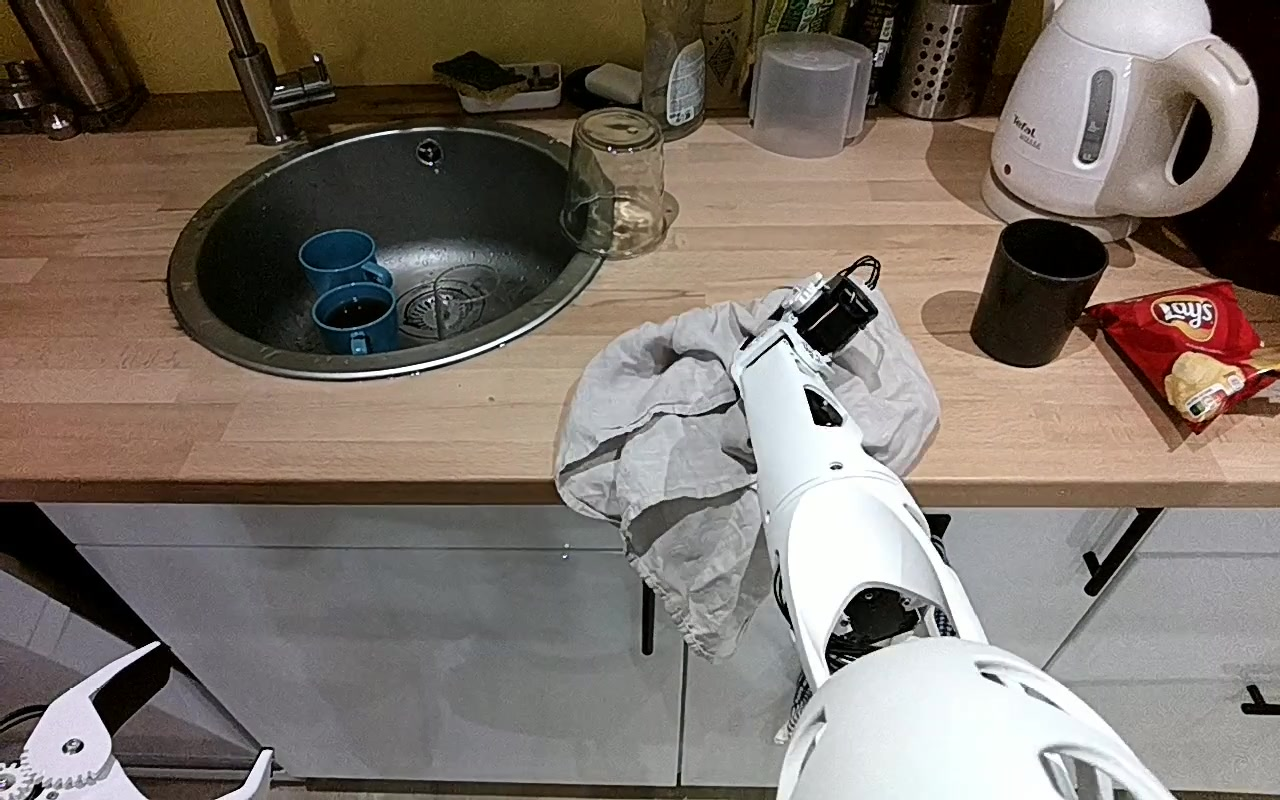

In [4]:
from datasets import load_dataset

dataset = load_dataset("pollen-robotics/reachy-doing-things", split="train")

img = dataset[11]['image']
img

## Run inference with the model

As explained, the OWL-ViT model is a zero shot object detection model and takes text queries as input. The inference is performed with the *infer* method. Just pass as argument a list of the candidate for the object detection that you want to detect. OWL-ViT will only try to detect classes that are in the list.

NB: Please note that the image passed as argument for the *infer* method must be a **numpy array object**.

In [5]:
predictions = object_detection_wrapper.infer(
    im=np.array(img),
    candidate_labels=["kettle", "black mug", "sink", "blue mug", "sponge", "bag of chips"],
    detection_threshold=0.15,
)

predictions

[{'score': 0.3089343309402466,
  'label': 'kettle',
  'box': {'xmin': 991, 'ymin': -4, 'xmax': 1266, 'ymax': 225}},
 {'score': 0.265211820602417,
  'label': 'blue mug',
  'box': {'xmin': 296, 'ymin': 228, 'xmax': 399, 'ymax': 349}},
 {'score': 0.2525636851787567,
  'label': 'sink',
  'box': {'xmin': 162, 'ymin': 118, 'xmax': 621, 'ymax': 380}},
 {'score': 0.19630835950374603,
  'label': 'bag of chips',
  'box': {'xmin': 1077, 'ymin': 279, 'xmax': 1277, 'ymax': 443}},
 {'score': 0.18654944002628326,
  'label': 'black mug',
  'box': {'xmin': 970, 'ymin': 219, 'xmax': 1117, 'ymax': 368}}]

Change the candidates list and check what you can detect!

### Visualize detection results

You can visualize easliy the predictions of the model with the *Annotator* class from utils.

In [6]:
from pollen_vision.vision_models.utils import Annotator

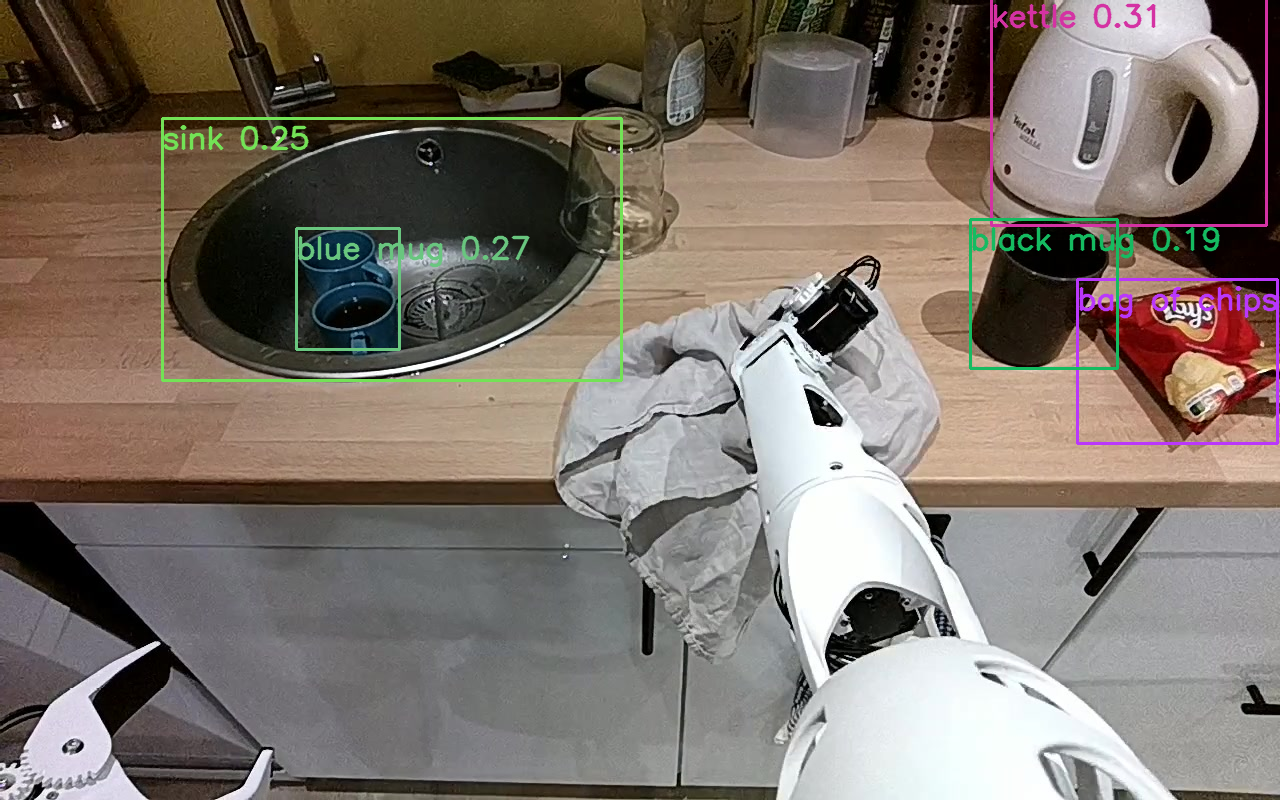

In [7]:
annotator = Annotator()

img_annotated = annotator.annotate(im=np.array(img), detection_predictions=predictions)
Image.fromarray(img_annotated)  # annotator returns a numpy array object

## Final notes

That's all folks! You can use [this script](https://github.com/pollen-robotics/pollen-vision/blob/99-make-the-notebooks-runnable-on-google-colab/scripts/annotate_video.py) if you want to perform zero shot object detection on a recorded video. The scripts gathers every commands that you saw here in the notebook.

Check out the [other notebooks](https://drive.google.com/drive/folders/1Xx42Pk4exkS95iyD-5arHIYQLXyRWTXw?usp=drive_link) if you want to learn how to use other vision models like RAM for image tagging or SAM to perform object segmentation.